# Imports

<i>Melakukan import modul pandas, numpy dan juga matplotlib. Chained assignment pada pandas dinon-aktifkan dan format secara global untuk angka diubah menjadi :,.2f</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

# menonaktifkan chained assignment pada pandas
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format

# setting tema jupyter untuk plotting
jtplot.style(theme='monokai')

# Membaca data

<i>Data yang digunakan dalam analisa ini adalah data penjualan PT Panatrade Caraka selama tahun berjalan 2022 (cut off bulan Maret 2022).</i>

In [2]:
data = pd.read_csv('Sales2022.csv')
data.head()

,Art,Desc.,Category,Quantity,Bruto,Net,Cogs,Profit,%,season,brand,categ,loc,customer,sportcast,inv,Id Cust,period,month,date
0,P10737-41,DERBY-BLACK/ORANGE/WHITE,FWEAR,6,"2,278,800.00","1,595,160.00","1,237,968.00","357,192.00",30.00%,2021,PIERO,FWEAR,DMA,CARI SEPATU - YOGYAKARTA ( CBD ),LS,PDF2200001,104C016,1,JAN,1/10/2022
1,P30179-43,NEOWAVE-BLACK/PHANTOM/WHITE,FWEAR,3,"1,049,400.00","734,580.00","542,407.68","192,172.32",30.00%,2021,PIERO,FWEAR,DMA,CARI SEPATU - YOGYAKARTA ( CBD ),AC,PDF2200001,104C016,1,JAN,1/10/2022
2,P30200-43,VX-WAVE-BLACK/WHITE,FWEAR,4,"1,399,200.00","979,440.00","676,760.36","302,679.64",30.00%,2021,PIERO,FWEAR,DMA,CARI SEPATU - YOGYAKARTA ( CBD ),LS,PDF2200001,104C016,1,JAN,1/10/2022
3,P20824-40,CITY RACE-NAVY/GREY/WHITE,FWEAR,2,"759,600.00","531,720.00","380,929.44","150,790.56",30.00%,2021,PIERO,FWEAR,DMA,CARI SEPATU - YOGYAKARTA ( CBD ),ES,PDF2200001,104C016,1,JAN,1/10/2022
4,P30178-45,NEOWAVE-OLIVE/BLACK/WHITE,FWEAR,2,"699,600.00","489,720.00","361,605.12","128,114.88",30.00%,2021,PIERO,FWEAR,DMA,CARI SEPATU - YOGYAKARTA ( CBD ),AC,PDF2200001,104C016,1,JAN,1/10/2022


# Memilih dan Membersihkan Data

In [3]:
# Selecting specific data
data_terpilih = data[['Art', 'Quantity', 'Bruto', 'Net', 'Cogs', 'Profit', 'brand', 'customer', 'date']]

# Cleaning data and converting string to float for some columns
data_terpilih['Quantity'] = data_terpilih['Quantity'].str.replace(',','').astype(float)
data_terpilih['Bruto'] = data_terpilih['Bruto'].str.replace(',','').astype(float)
data_terpilih['Net'] = data_terpilih['Net'].str.replace(',','').astype(float)
data_terpilih['Cogs'] = data_terpilih['Cogs'].str.replace(',','').astype(float)
data_terpilih['Profit'] = data_terpilih['Profit'].str.replace(',','').astype(float)

## I. Perhitungan Diskon

$
\begin{align}
disc = \frac{bruto - net}{bruto}
\end{align}
$

In [4]:
data_terpilih['discount'] = (data_terpilih['Bruto'] - data_terpilih['Net']) / data_terpilih['Bruto']

In [5]:
# selected_data basic information
print(data_terpilih.describe())

       Quantity          Bruto            Net          Cogs        Profit  \
count 56,293.00      56,293.00      56,293.00     56,293.00     56,293.00   
mean       8.25   2,837,451.46   1,801,463.84  1,193,161.90    608,301.94   
std       29.40   5,689,682.46   3,408,645.28  2,277,587.64  1,222,853.10   
min        0.00           0.00           0.00   -535,306.27 -3,720,384.81   
25%        2.00     799,200.00     503,712.00    330,683.20    149,707.16   
50%        3.00   1,398,000.00     863,898.00    593,406.18    301,328.00   
75%        6.00   2,878,800.00   1,841,830.00  1,233,212.82    628,299.90   
max    1,527.00 227,880,000.00 148,122,000.00 82,152,999.05 68,820,588.05   

       discount  
count 56,255.00  
mean       0.34  
std        0.07  
min        0.15  
25%        0.33  
50%        0.33  
75%        0.33  
max        0.80  


### I.1 Pengelompokan dan Penjumlahan Net Sales Berdasarkan Tingkat Diskon

In [6]:
net_berdasar_disc = data_terpilih[['discount', 'Net']].groupby(['discount']).sum()

#### I.1.a Informasi Net Sales Berdasar Pengelompokan Tingkat Diskon

In [7]:
print(net_berdasar_disc.sort_values(by='Net', ascending=False))

                       Net
discount                  
0.33     60,029,116,990.00
0.30     11,673,411,960.00
0.38      5,534,983,908.00
0.53      5,148,783,260.00
0.35      4,855,786,260.00
0.31      3,532,137,048.00
0.32      2,917,309,480.00
0.40      1,331,205,960.00
0.60      1,010,995,040.00
0.15        611,966,000.00
0.27        529,091,882.00
0.70        481,627,500.00
0.29        403,354,550.00
0.41        392,705,937.00
0.28        311,091,840.00
0.75        304,108,150.00
0.56        293,175,960.00
0.75        274,068,233.46
0.45        266,860,330.00
0.65        235,005,260.00
0.80        230,410,140.00
0.37        200,656,134.00
0.39        200,168,328.00
0.50        172,391,150.00
0.20        124,909,600.00
0.70         66,145,581.18
0.34         62,848,236.00
0.38         59,371,200.00
0.70         32,847,805.62
0.55         29,148,660.00
0.75         21,601,437.12
0.41         17,409,600.00
0.43         16,088,738.40
0.41         11,011,572.00
0.36         10,764,672.00
0

In [8]:
print(net_berdasar_disc.describe())

                    Net
count             38.00
mean   2,668,679,049.64
std    9,830,334,723.57
min        2,189,527.20
25%       39,478,654.21
50%      250,932,795.00
75%      591,247,470.50
max   60,029,116,990.00


### I.2 Pengelompokan dan Penjumlahan Net Sales Berdasarkan Customer

In [9]:
net_berdasar_cust = data_terpilih[['customer', 'Net']].groupby(['customer']).sum()

#### I.2.aTotal Nilai Net Sales

In [10]:
net_berdasar_cust.sum()

Net   101,409,803,886.38
dtype: float64

#### 1.2.b Informasi Net Sales Berdasar Pengelompokkan Customer

In [11]:
print(net_berdasar_cust.describe())

                   Net
count           191.00
mean    530,941,381.60
std   1,100,844,978.09
min       2,061,306.00
25%      45,325,165.00
50%     151,818,052.00
75%     543,501,646.00
max   7,922,778,430.00


<i>Berikut adalah kontribusi net sales YTD 2022 untuk customer dengan total nilai net sales di atas nilai rata - rata net sales dari semua customer (kecuali PT Prestasi Retail Innovation)</i>

In [12]:
# slicing customer by customer with net sales above the average net sales
cust_diatas_rerata = net_berdasar_cust.loc[(net_berdasar_cust['Net'] > net_berdasar_cust['Net'].mean()) & 
                                           (net_berdasar_cust.index != "PRESTASI RETAIL INNOVATION PT")].sort_values(by=['Net'], ascending=False)
print(cust_diatas_rerata)

                                                                Net
customer                                                           
ARIF SPORT SOLO CV                                 7,269,582,657.38
ARIMBI ADIPUTRA CV - SURABAYA                      7,005,881,008.00
INTI KWAN LEE PT                                   4,347,616,340.00
GLOBAL RETAILINDO DIGITAL PT                       3,334,030,870.00
LIBERTY STORE CV - JAMBI                           3,331,326,658.00
GLOBAL MITRA SPORTINDO PT                          3,284,242,990.00
CEMERLANG, KENDAL                                  3,225,719,180.00
SETH SPORTS ( CASH )                               2,629,404,226.00
MENCETAK BANYAK GOL PT. ( GBD 60 )                 1,861,490,206.00
MAHKOTA - SAMARINDA                                1,857,421,264.00
RAY SPORTINDO CV - SLEMAN ( CBD )                  1,675,815,214.00
ANEKA SPORT - BUKIT TINGGI XXXL ( CASH )           1,627,270,860.00
KICO SPORT                                      

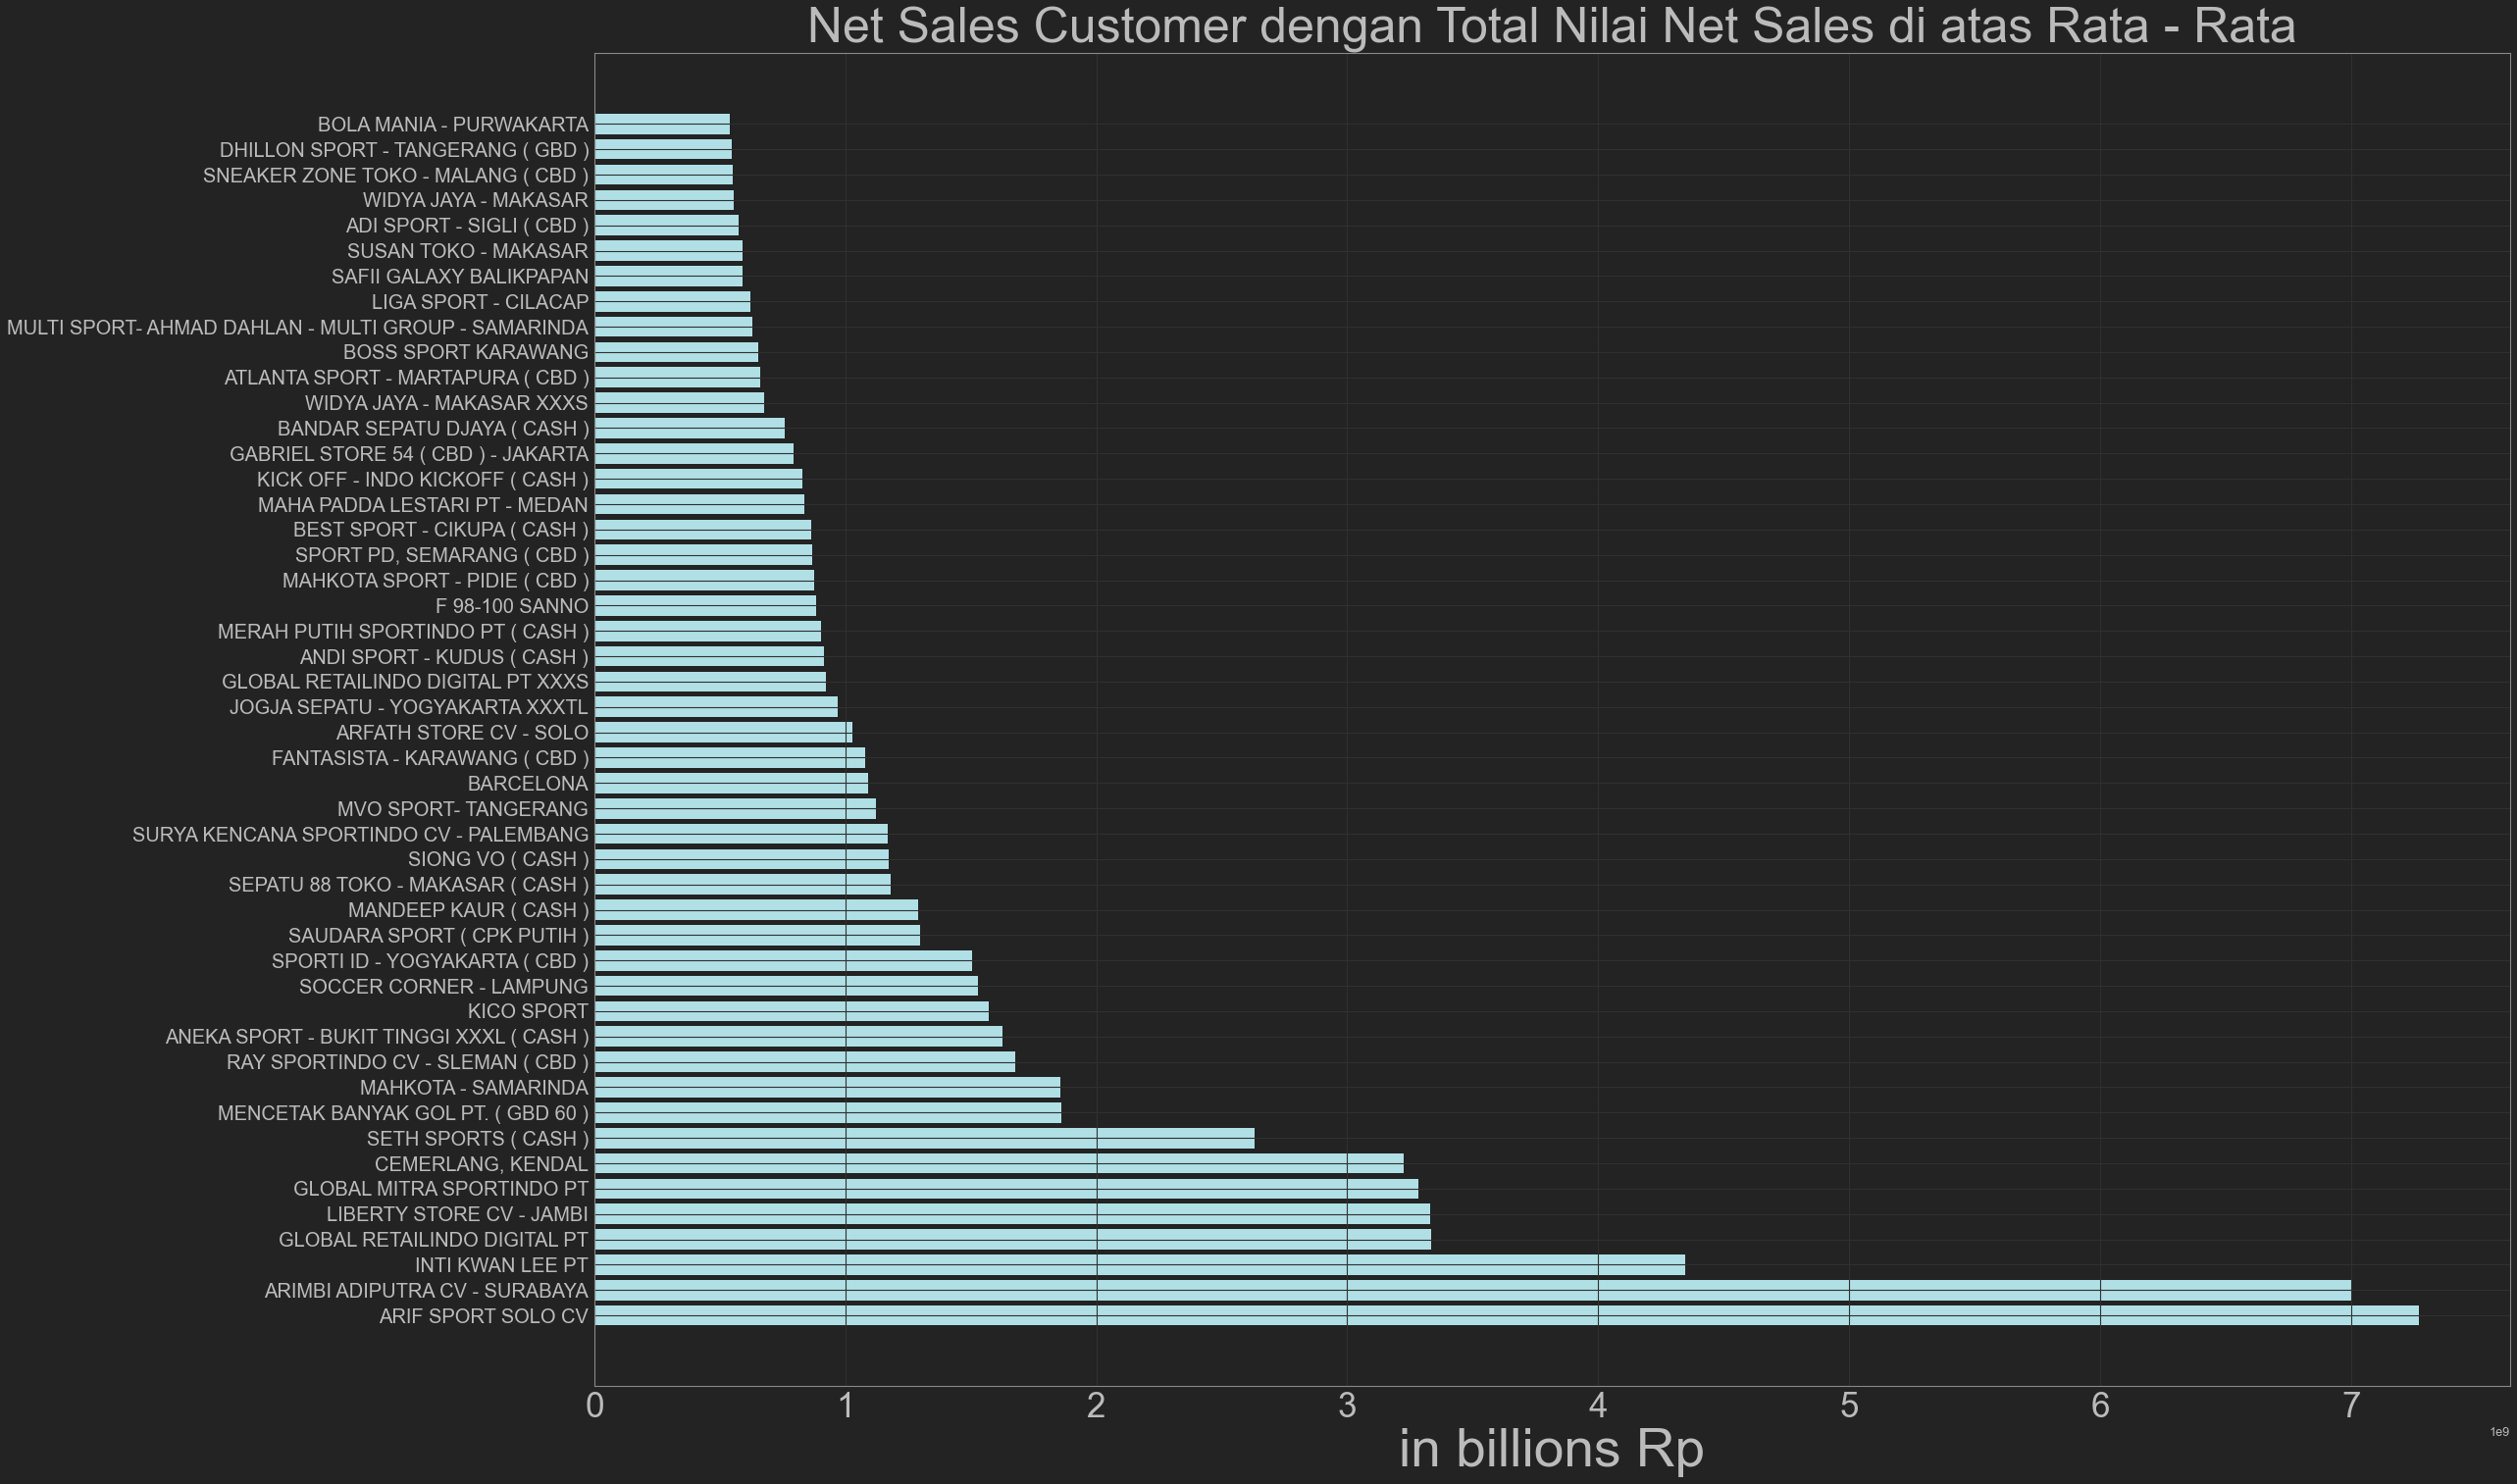

In [13]:
plt.figure(figsize=(35,25))
plt.barh(cust_diatas_rerata.index, cust_diatas_rerata['Net'], color='powderblue')
plt.xlabel("in billions Rp", fontsize=55)
plt.title("Net Sales Customer dengan Total Nilai Net Sales di atas Rata - Rata", fontsize=50)
plt.yticks(fontsize=20)
plt.xticks(fontsize=35)
plt.show()

### I.3 Pengelompokkan dan Penjumlahan Net Sales Berdasarkan Customer dan Tingkat Diskon

In [14]:
net_berdasar_disccust = data_terpilih[['customer', 'discount', 'Net']].groupby(['customer', 'discount']).sum()
net_berdasar_disccust_top_dua = net_berdasar_disccust.loc[(slice('ARIF SPORT SOLO CV', 'ARIMBI ADIPUTRA CV - SURABAYA'))]
print(net_berdasar_disccust_top_dua)

                                                    Net
customer                      discount                 
ARIF SPORT SOLO CV            0.30       415,660,560.00
                              0.33     5,768,285,806.00
                              0.35       288,611,830.00
                              0.38       352,350,960.00
                              0.41        33,220,044.00
                              0.60        16,790,400.00
                              0.70        66,145,581.18
                              0.70        32,847,805.62
                              0.75        21,601,437.12
                              0.75       274,068,233.46
ARIMBI ADIPUTRA CV - SURABAYA 0.30       460,003,600.00
                              0.33     5,816,383,096.00
                              0.35        74,168,640.00
                              0.38       638,535,272.00
                              0.60        16,790,400.00
